                                                                                                   Niya Garner
                                                                                                   CMSE 492 001
                                                                                                   April 2023
                                                                                                  
                                                                           
                                                                                                
 # CMSE 492: Final Project

<h1><font color='green'> Machine Learning Algorithms: Gene Splicing</font></h1>

## 1. Background & Motivation

Recognizing splice junctions is an essential task in molecular biology that allows us to identify the areas in the DNA sequence that will be removed  during the process of protein synthesis in complex organisms. The issue that arises is how time consuming and tedious this process is. The goal of my project is to create a machine learning algorithm that streamlines the process of recognizing the boundaries between exons and introns. Furthermore,  I think this project is useful because the model is acting like a virtual ribonucleoprotein (snRNP) because they can accurately recognize the start and end points of the intron. In gene sequencing only the exon portion of the DNA becomes mature RNA and is expressed. The intron portion of the DNA sequence gets spliced out. I will be creating several different machine learning algorithms to compare their accuracies and choose the best model for my problem. 

## 2. Methodology


The original dataset is sourced from The University of California School of Information and Computer Science 

#### Column Description

Region: Specific semgment of the DNA Sequence. EI (Extron), IE (Intron, N (Neither)  
 
Participant Id: DNA donor's identification 
 
DNA Sequence: The precise arrangement of bases or nucleotides in a DNA molecule


### 2.1 Data Processing

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from statistics import mean

In [2]:
#Loading Dataset & adding column headers

data = pd.read_csv("splice.data")
data.columns =['Region', 'Participant ID', 'DNA Sequence']
data.head()

,Region,Participant ID,DNA Sequence
0,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
1,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
2,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
3,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...
4,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTA...


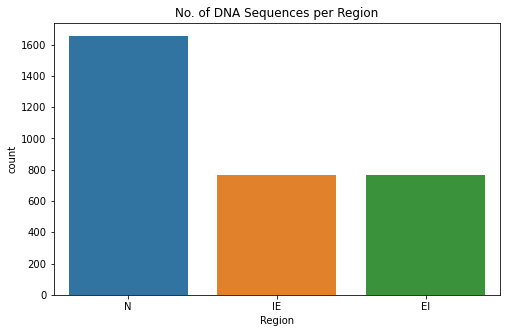

In [3]:
# Create a plot showcasing the NO. of Variables in each Category
plt.figure(figsize=(8,5))
sns.countplot(x ='Region', data= data, order= data['Region'].value_counts().index).set(
    title='No. of DNA Sequences per Region')
plt.show()

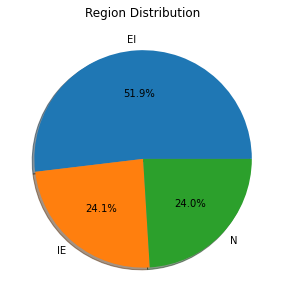

In [4]:
counts = data['Region'].value_counts()
labels  = data['Region'].unique()
plt.figure(1, figsize=(8,5))
cmap = plt.get_cmap('tab20')

plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Region Distribution')
plt.show()

In [5]:
#Generating Independent Variable Vectors
x = data.iloc[:,-1].values

#Generating Dependent Variable Vectors
y = data.iloc[:,0].values

# Use later for cross validation
y_og = data.iloc[:,0].values

print(x)
print(y_og)

['               AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'
 '               GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'
 '              GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC'
 ...
 '                TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'
 '                 ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'
 '                AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']
['EI' 'EI' 'EI' ... 'N' 'N' 'N']


In [6]:
#Encoding Categorical Variable DNA Sequence

x = np.array(x)

labelEnc = preprocessing.LabelEncoder()
new_x = labelEnc.fit_transform(x)
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_x.reshape(-1, 1))
x_trans = onehotEnc.transform(new_x.reshape(-1, 1))
print("The original data")
print(x)
print("The transform data using OneHotEncoder")
print(x_trans.toarray())

# Code sourced from https://www.educative.io/blog/one-hot-encoding

The original data
['               AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC'
 '               GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG'
 '              GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC'
 ...
 '                TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCCCCGACGTGTGTGTC'
 '                 ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAAGAAAACCAAAACAA'
 '                AGGCTGCCTATCAGAAGGTGGTGGCTGGTGTGGCTGCTGCTCTGGCTCACAAGTACCATT']
The transform data using OneHotEncoder
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
#Encoding Categorical Variable Region
y = np.array(y)

labelEnc = preprocessing.LabelEncoder()
new_y = labelEnc.fit_transform(y)
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_y.reshape(-1, 1))
y_trans = onehotEnc.transform(new_y.reshape(-1, 1))
print("The original data")
print(y)
print("The transform data using OneHotEncoder")
print(y_trans.toarray())

The original data
['EI' 'EI' 'EI' ... 'N' 'N' 'N']
The transform data using OneHotEncoder
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [8]:
#Assignning encoded data as original varibales

x = x_trans.toarray()
y = y_trans.toarray()

In [9]:
#Splitting dataset into training and testing dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

#Performing Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

len(x_test)

638

### 2.2 Developing & Training Different Machine Learning Algorithms

#### 2.2.1 Creating Artificial Neural Network

In [10]:
#Initialising Artificial Neural Network (ANN)

ANN = tf.keras.models.Sequential()

#Creating Hidden Layers

#First Hidden Layer
    # Units - number or neurons & Activation - activation function used
ANN.add(tf.keras.layers.Dense(units = 32,activation = "relu"))

#Second Hidden Layer
ANN.add(tf.keras.layers.Dense(units = 18,activation = "relu"))

#Layer to avoid overfitting
ANN.add(tf.keras.layers.Dropout(0.2))

#Creating Output Layer
    # units set to the number of categories in region & activation "softmax" for multiclass classification
ANN.add(tf.keras.layers.Dense(units = 3,activation="softmax",kernel_initializer="normal"))

#Compiling Artificial Neural Network (ANN)
    # loss function - categorical_crossentropy for multiclass classification
ANN.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

#Fitting Artificial Neural Network (ANN)
ANN.fit(x_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 1.0699 - accuracy: 0.4567
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.9575 - accuracy: 0.5092
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7451 - accuracy: 0.6025
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8577
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9635
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9863
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9933
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9957
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9976
Epoch 10/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9957
Epoch 11/

### 2.2.2 Creating K-Nearest Neighbors, Logistic Regression, SVM, & Random Forest

In [11]:
# Initialzing a list with all of the other Machine Learning Algorithms

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()  
}

# Creating a loop to imbed each machine learning algorithm in OneVsRestClassifier 
# Converts the Multiclass problem into multiple binary sets
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

# Creating a loop to perfrom Fitting on eacg algorithm 
for i in model_list:
    i.fit(x_train, y_train)

# Evaluating the accuracy of each algorithm
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(x_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(x_test, y_test))
    
# Code sourced from https://www.kaggle.com/code/omkyaghav/resume-screening-using-nlp-different-ml-algorithms

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.2555860446883575
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.2006269592476489
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.603448275862069
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.04231974921630094
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 0.9984319874558997
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on test set : 0.6018808777429467


### 2.3 Evaluating the performance of the Algorithms

In [12]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(x_test)))
    print("*"*80)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.20      1.00      0.33       128
           2       0.00      0.00      0.00       358

   micro avg       0.20      0.20      0.20       638
   macro avg       0.07      0.33      0.11       638
weighted avg       0.04      0.20      0.07       638
 samples avg       0.20      0.20      0.20       638

********************************************************************************
 
OneVsRestClassifier(estimator=LogisticRegression()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       152
           1       1.00      0.11      0.20       128
           2       0.59      1.00      0.74       358

   micro avg       0.60      0.60      0.60       638
   macro avg       0.86      0.40      0.36       638
w

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.24      1.00      0.39       152
           1       0.20      1.00      0.34       128
           2       0.00      0.00      0.00       358

   micro avg       0.22      0.44      0.30       638
   macro avg       0.15      0.67      0.24       638
weighted avg       0.10      0.44      0.16       638
 samples avg       0.24      0.44      0.31       638

********************************************************************************
 
OneVsRestClassifier(estimator=RandomForestClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.09      0.16       152
           1       1.00      0.10      0.18       128
           2       0.59      1.00      0.74       358

   micro avg       0.60      0.60      0.60       638
   macro avg       0.86      0.40      0.36       6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Evaluating the accuracy of the Artificial Neural Network

ANN.evaluate(x_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 8.6784 - accuracy: 0.6034


[8.678400039672852, 0.6034482717514038]

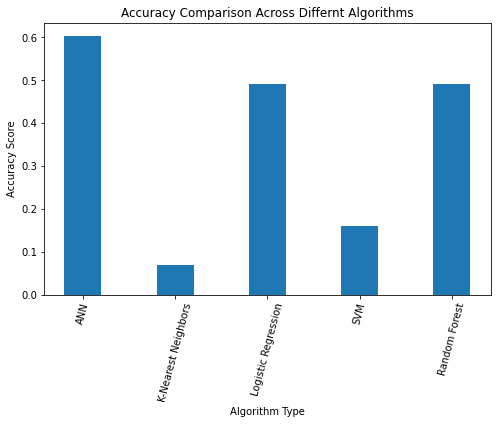

In [14]:
# Create a plot showcasing the Accuracy Comparison Across Differnt Algorithms
plt.figure(figsize=(8,5))
my_cmap = plt.get_cmap("viridis")
algorithms = ['ANN','K-Nearest Neighbors', 'Logistic Regression','SVM','Random Forest']
accuracies = [0.6034,0.07,0.49,0.16,0.49]
plt.bar(algorithms, accuracies, width = 0.4)
plt.xticks(rotation=75)
plt.xlabel("Algorithm Type")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison Across Differnt Algorithms")
plt.show()

## 3. Discussion & Conclusion

In conclusion, given the accuracy matrices, my hypothesis was neither supported nor denied. The Neural Network indeed had one of the highest accuracies with a score of nearly 61 percent. However, the logistic regression and random forest models were relatively close with an accuracy of 49 percent. Given my findings I would still recommend using a Neural Network because additional changes can be made to optimize the results. For instance, further manipulating the weights, changing the number of nodes, and adding more hidden layers. Making sure to take into account that you do not want to over fit the data. There is also the option of using Knowledge Based Artificial Neural Networks (KBANN), Convolutional Neural Networks (CNN), and Recurrent Neural Network (RNN).

## 4. References

Data Science in 5 minutes: What is one hot encoding? Educative. (n.d.). Retrieved April 28, 2023, from https://www.educative.io/blog/one-hot-encoding 

Hazra, A. (2022, August 3). Top 7 cross-validation techniques with Python Code. Analytics Vidhya. Retrieved April 28, 2023, from https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/ 

Shrutimechlearn. (2019, April 7). Deep Tutorial 1 ann and Classification. Kaggle. Retrieved April 28, 2023, from https://www.kaggle.com/code/shrutimechlearn/deep-tutorial-1-ann-and-classification 

UCI Machine Learning Repository: Molecular Biology (splice-junction gene sequences) data set. (n.d.). Retrieved April 28, 2023, from https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Splice-junction+Gene+Sequences) 